Lab 1 - Keith Farrugia 11104L

***
# Imports

Below are the imports used in the following lab.

In [103]:
import os
from scipy import signal
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
import IPython.display as ipd

***
# Working with Real-World Audio Signals

## Loading of imperfect_sos_cw_700_15_wpm.mp3

In [90]:


imperfect_fs, imperfect_x = wavfile.read(os.path.join('data','imperfect_sos_cw_700_15_wpm.wav'))
ipd.display(ipd.Audio(data=imperfect_x, rate=imperfect_fs))


## Plotting Imported Values

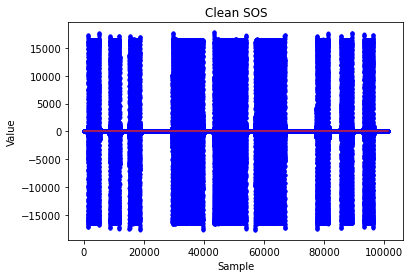

In [91]:
plt.figure()
plt.stem(imperfect_x,markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Clean SOS')
plt.show()

## Plotting Sample

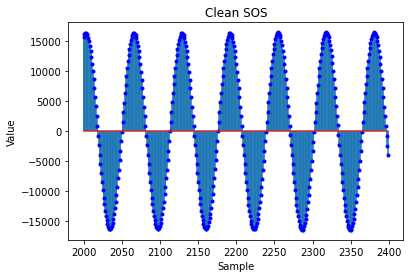

In [92]:
plt.figure()
t = range(2000,2400)
plt.stem(t,imperfect_x[t],markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Clean SOS')
plt.show()


***
# Noisy Audio Signal

## Importing and Plotting of Noisy Signal

### Importing Noisy Signal



In [93]:
noisy_fs, noisy_x = wavfile.read(os.path.join('data','noisy_sos_cw_700_15_wpm.wav'))
ipd.display(ipd.Audio(data=noisy_x, rate=noisy_fs))

### Plotting full Noisy Signal

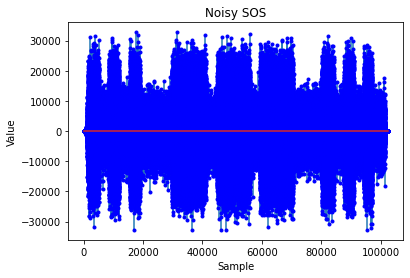

In [94]:
plt.figure()
plt.stem(noisy_x,markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Noisy SOS')
plt.show()

### Plotting Sample Noisy Signal

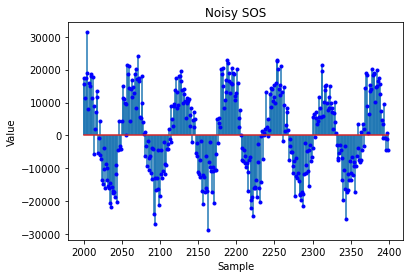

In [95]:
plt.figure()
t = range(2000,2400)
plt.stem(t,noisy_x[t],markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Noisy SOS')
plt.show()

## Comparison of the two waves
Although the two signals create a similar wave when plotted, it is clear that the second signal, "noisy SOS", has some sort of interference placed upon it. This can be seen by the sudden increases, decreases or spikes in values which show distortion and unwanted noise. 

***
# Moving Average Filter

## Creating an impulse response

To create an impulse response that takes the average of the range of values, a new signal, or in this case, array h, must be created.

By the definition of convolution:

$y[n] = \displaystyle\sum\limits_{k=-\infty}^{\infty} x[k] h[n-k]$

If we take a sample array for x such that x = [1, 3, 4], and take an example of sample length 3, then the average at position x[1] would be: 

$\frac{(x[0] + x[1] + x[2])}3$

This in turn can be written as:

$x[0]\frac{1}3 + x[1]\frac{1}3 + x[2]\frac{1}3$

Therefore by this logic h[n] needs to be an array of size sample-length holding the values $\frac{1}{sample-length}$

In [96]:
def create_sample (length_sample):
    return [1/length_sample]*length_sample

## Applying and Plotting Convolution

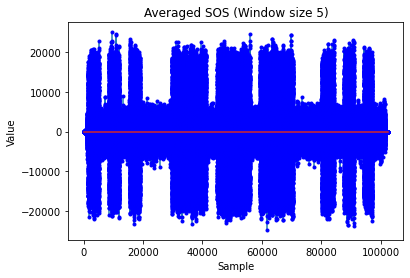

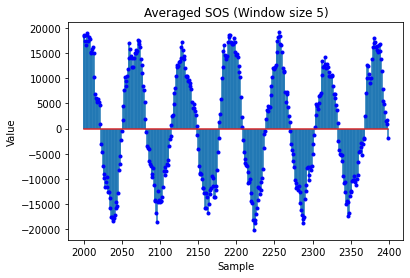

In [97]:

h =  create_sample(5)



SampleSize_5_y = signal.convolve(noisy_x,h)

plt.figure()
plt.stem(SampleSize_5_y,markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Averaged SOS (Window size 5)')
plt.show()

plt.figure()
t = range(2000,2400)
plt.stem(t,SampleSize_5_y[t],markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Averaged SOS (Window size 5)')
plt.show()


## Comparison of the 2 Signals


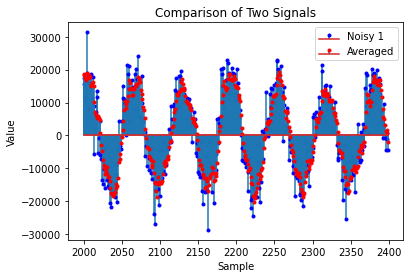

In [98]:

plt.figure()
plt.subplot()
t = range(2000,2400)
plt.stem(t, noisy_x[t], markerfmt='b.', label='Noisy 1')
plt.stem(t, SampleSize_5_y[t], markerfmt='r.', label='Averaged')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Comparison of Two Signals')
plt.legend()
plt.show()

It can be seen that the averaged signal does in fact reduce the spikes made by the noise in the original signal. However it does not fully remove the noise from said signal and some is still left.

## Longer Moving Window

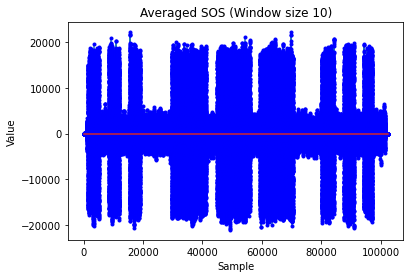

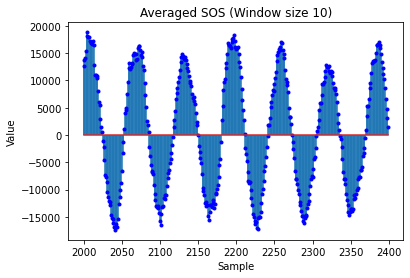

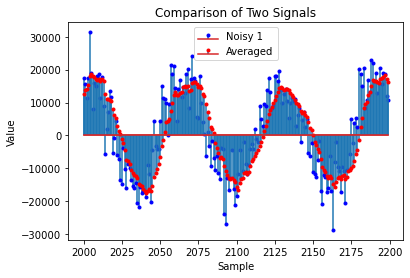

In [99]:
h =  create_sample(10)


SampleSize_10_y = signal.convolve(noisy_x,h)

plt.figure()
plt.stem(SampleSize_10_y,markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Averaged SOS (Window size 10)')
plt.show()

plt.figure()
t = range(2000,2400)
plt.stem(t,SampleSize_10_y[t],markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Averaged SOS (Window size 10)')
plt.show()

plt.figure()
plt.subplot()
t = range(2000,2200)
plt.stem(t, noisy_x[t], markerfmt='b.', label='Noisy 1')
plt.stem(t, SampleSize_10_y[t], markerfmt='r.', label='Averaged')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Comparison of Two Signals')
plt.legend()
plt.show()

The  points/graph seems to follow a smoother curve showing that more of the noise is removed due to the larger average/range of values being taken.


## Even Longer window

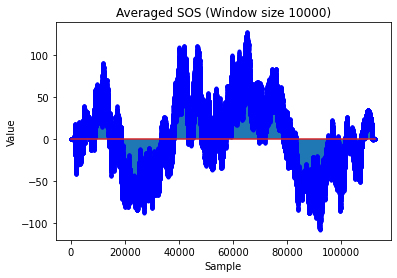

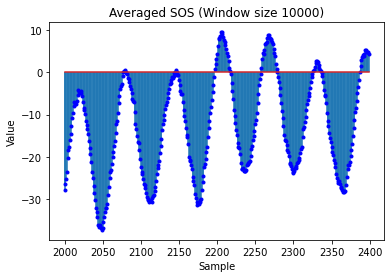

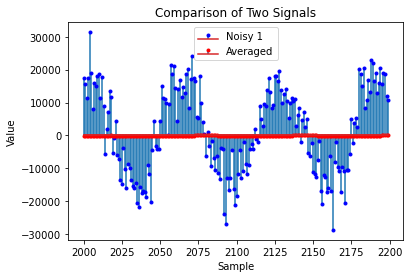

In [100]:
h =  create_sample(10000)

SampleSize_10000_y = signal.convolve(noisy_x,h)

plt.figure()
plt.stem(SampleSize_10000_y,markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Averaged SOS (Window size 10000)')
plt.show()

plt.figure()
t = range(2000,2400)
plt.stem(t,SampleSize_10000_y[t],markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Averaged SOS (Window size 10000)')
plt.show()

plt.figure()
plt.subplot()
t = range(2000,2200)
plt.stem(t, noisy_x[t], markerfmt='b.', label='Noisy 1')
plt.stem(t, SampleSize_10000_y[t], markerfmt='r.', label='Averaged')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Comparison of Two Signals')
plt.legend()
plt.show()

In this case the window was extended to 10000, although this might be a bit drastic it goes to show that after a certain point the wave itself starts to distort until it no longer resembles the original. In this case the wave itself is practically flattened into an almost straight line.

***

# Band-Pass Filter

## Filter Impulse Response Plot

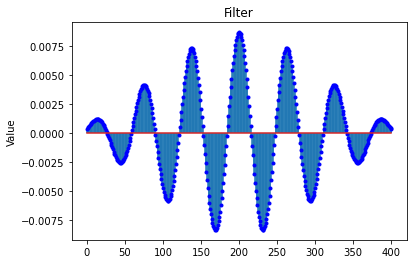

In [101]:
filter = np.load(os.path.join('data','filter.npy'))
plt.figure()
plt.stem(filter,markerfmt='b.')
plt.xlabel('')
plt.ylabel('Value')
plt.title('Filter')
plt.show()

## Applied Filter

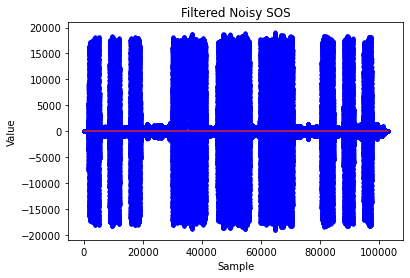

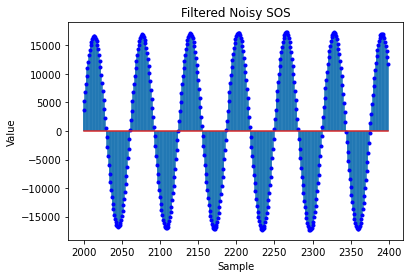

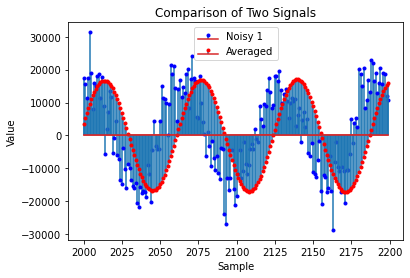

In [102]:

filtered_y = signal.convolve(noisy_x,filter)

plt.figure()
plt.stem(filtered_y,markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Filtered Noisy SOS')
plt.show()

plt.figure()
t = range(2000,2400)
plt.stem(t,filtered_y[t],markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Filtered Noisy SOS')
plt.show()

plt.figure()
plt.subplot()
t = range(2000,2200)
plt.stem(t, noisy_x[t], markerfmt='b.', label='Noisy 1')
plt.stem(t, filtered_y[t], markerfmt='r.', label='Averaged')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Comparison of Two Signals')
plt.legend()
plt.show()

ipd.display(ipd.Audio(data=filtered_y, rate=noisy_fs))

## Comparison 
The filter had a larger and more significantly positive effect on reducing the noise, compared to that of the average method. The wave is almost perfectly restored to its original form although a hollow sound (similare to wind) can still be heard when the audio is played, showing that there is still some very slight distortion.